In [1]:
import pandas as pd 
df = pd.read_parquet('/kaggle/input/data-for-classify-ds67/data_for_classify_ds67/cpp/test.parquet')

In [23]:
df.head(1)

,task_id,completion_id,num_tokens,generation,first_token_embedding,last_token_embedding,first_token_code_embedding,last_token_code_embedding,has_error,extracted_code,label
0,HumanEval_23_strlen,HumanEval_23_strlen_0,92,Here is the completed function in C++:\n\n```c...,"[-0.212890625, 0.31640625, -0.353515625, 0.104...","[0.140625, 0.416015625, 0.1376953125, 0.229492...","[-0.0712890625, 0.33984375, 0.08349609375, 0.0...","[0.341796875, 0.3359375, -0.1455078125, 0.0480...",False,\n#include<assert.h>\n#include<bits/stdc++.h>\...,1


In [2]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
def plot(X,y):
    tsne = TSNE(n_components=2,perplexity=20, random_state=42)
    X_2d = tsne.fit_transform(np.array([el.tolist() for el in X]))
    plt.scatter(X_2d[y == 0, 0], X_2d[y == 0, 1], label="Label 0", alpha=0.6, c="blue")
    plt.scatter(X_2d[y == 1, 0], X_2d[y == 1, 1], label="Label 1", alpha=0.6, c="red")
    
    plt.legend()
    plt.title("t-SNE Visualization")
    plt.show()



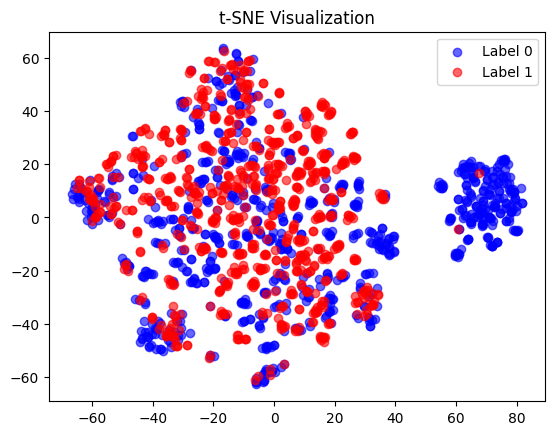

In [46]:
X = df['last_token_embedding'].values
y = df['label'].values
plot(X,y)

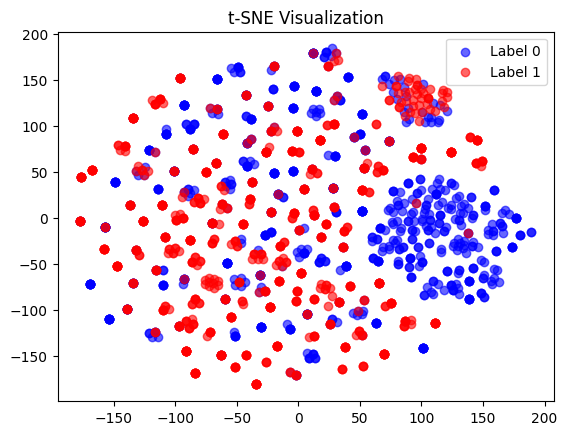

In [47]:
X = df['first_token_embedding'].values
y = df['label'].values
plot(X,y)

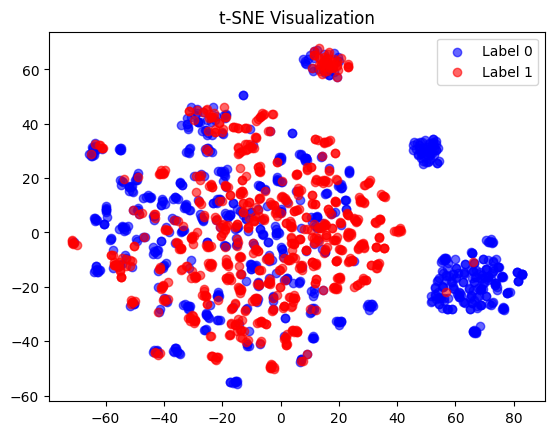

In [9]:
def sub_vector(x2,x1):
    x3 = list(x2) 
    for idx,i in enumerate(x1):
        x3[idx] = x3[idx] -i
    return x3
X1 = df['first_token_embedding'].values
X2 = df['last_token_embedding'].values
X = np.array([sub_vector(x2,x1) for x2,x1 in zip(X2,X1)])
y = df['label'].values
plot(X,y)